ZIP file found. Extracting...
Extraction completed successfully.
Extracted Data Directory Contents: ['blue_jellyfish', 'lions_mane_jellyfish', 'compass_jellyfish', 'mauve_stinger_jellyfish', 'Train_Test_Valid', 'barrel_jellyfish', 'Moon_jellyfish']


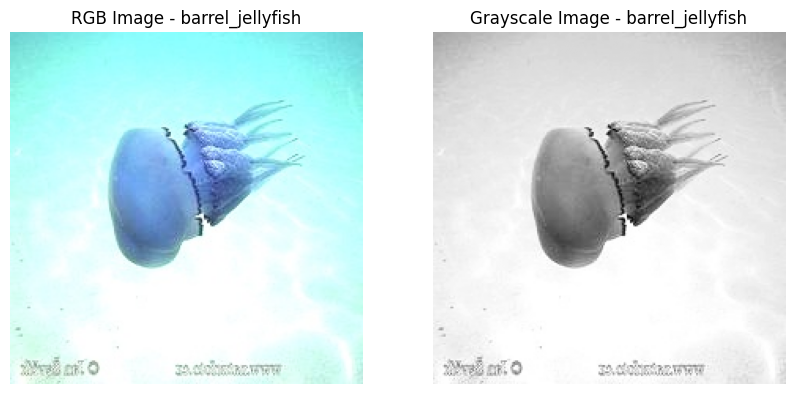

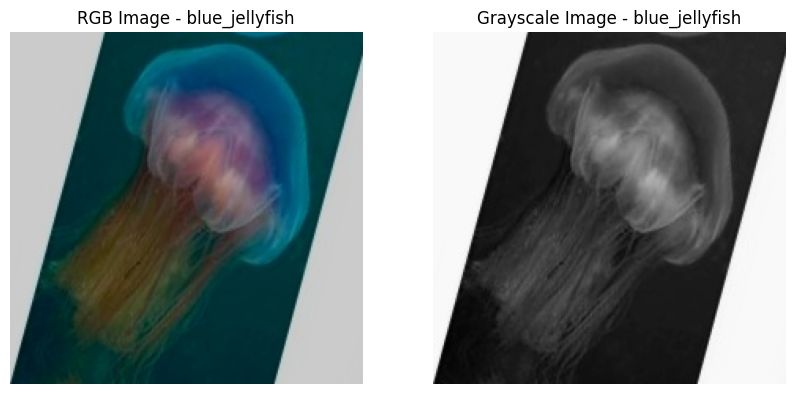

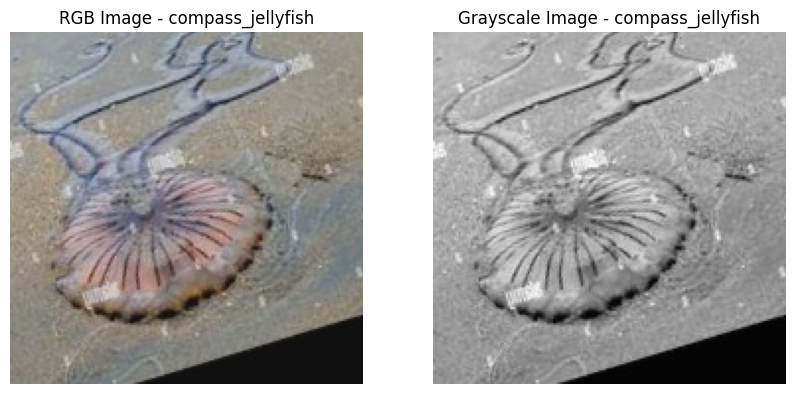

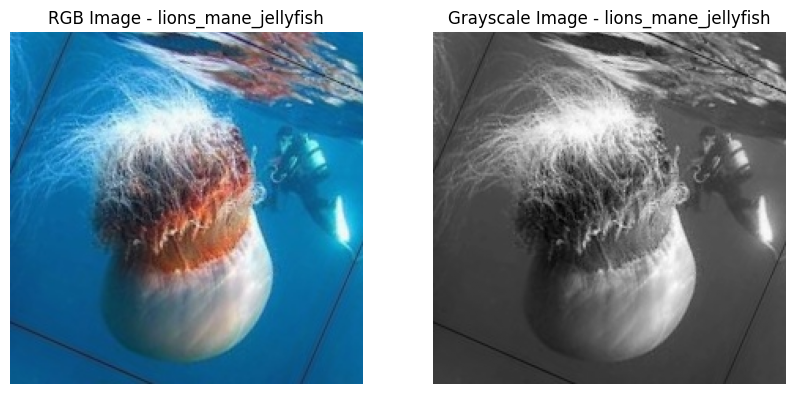

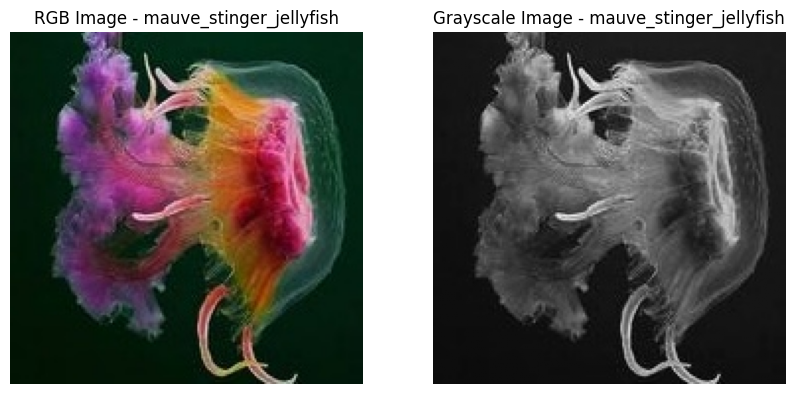

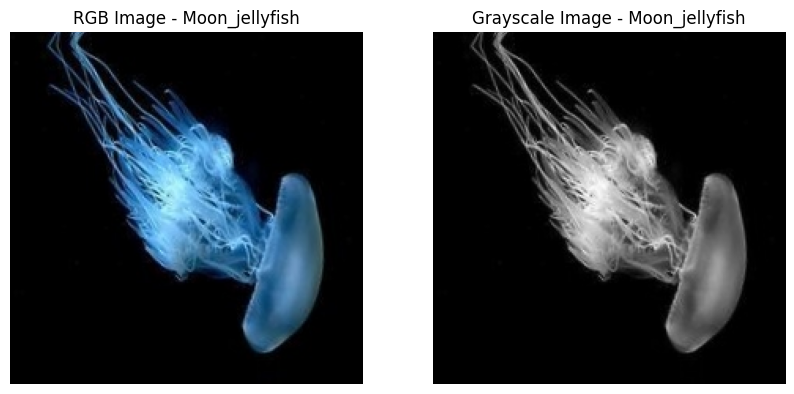

In [12]:
import os
import zipfile
import cv2
import matplotlib.pyplot as plt

# Define paths
zip_path = "/jellyfish dataset.zip"
extract_dir = "/mnt/data/Satellite_extracted"
data_dir = extract_dir  # Corrected data_dir
subfolders = ["barrel_jellyfish", "blue_jellyfish", "compass_jellyfish", "lions_mane_jellyfish", "mauve_stinger_jellyfish", "Moon_jellyfish"]

# Step 1: Check if the ZIP file exists
if not os.path.exists(zip_path):
    print("Error: ZIP file not found!")
else:
    print("ZIP file found. Extracting...")

    # Step 2: Extract the ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Extraction completed successfully.")

    # Step 3: Verify extraction
    if os.path.exists(data_dir):
        print("Extracted Data Directory Contents:", os.listdir(data_dir))
    else:
        print("Error: 'data' directory not found inside extracted folder.")

    # Step 4: Process images
    for category in subfolders:
        category_path = os.path.join(data_dir, category)

        if not os.path.exists(category_path):
            print(f"Warning: Directory '{category_path}' not found. Skipping...")
            continue

        image_files = os.listdir(category_path)

        if not image_files:
            print(f"Warning: No images found in '{category_path}'. Skipping...")
            continue  # Skip empty folders

        # Select a sample image from each category (Added image file check)
        for file in image_files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                sample_image_path = os.path.join(category_path, file)
                break  # Found an image, stop looking
        else:
            print(f"Warning: No image files found in '{category_path}'. Skipping...")
            continue  # No image files in this category folder

        # Load image in RGB and grayscale
        image_rgb = cv2.imread(sample_image_path)
        image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image_gray = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

        # Display the images
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(image_rgb)
        axes[0].set_title(f"RGB Image - {category}")
        axes[0].axis("off")

        axes[1].imshow(image_gray, cmap="gray")
        axes[1].set_title(f"Grayscale Image - {category}")
        axes[1].axis("off")

        plt.show()

In [11]:
import os
import zipfile
import cv2
import matplotlib.pyplot as plt

# Define paths
zip_path = "/content/jellyfish dataset.zip"  # Verify this path
extract_dir = "/mnt/data/Satellite_extracted"
data_dir = extract_dir  # Corrected data_dir
subfolders = ["barrel_jellyfish", "blue_jellyfish", "compass_jellyfish", "lions_mane_jellyfish", "mauve_stinger_jellyfish", "Moon_jellyfish"]

# Step 1: Check if the ZIP file exists and is a valid ZIP archive
if not os.path.exists(zip_path):
    print("Error: ZIP file not found!")
else:
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # If this line executes without error, it's likely a valid ZIP
            print("ZIP file found and appears valid. Extracting...")
            zip_ref.extractall(extract_dir)
            print("Extraction completed successfully.")
    except zipfile.BadZipFile:
        print("Error: The ZIP file is either corrupt or not a valid ZIP archive.")
        # Handle the error here (e.g., re-download, prompt user for action)

    # ... (rest of your code)

Error: The ZIP file is either corrupt or not a valid ZIP archive.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.1982 - loss: 1.8118 - val_accuracy: 0.3389 - val_loss: 1.5921
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3544 - loss: 1.5627 - val_accuracy: 0.4167 - val_loss: 1.3809
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4403 - loss: 1.3995 - val_accuracy: 0.5444 - val_loss: 1.1963
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5631 - loss: 1.1761 - val_accuracy: 0.5333 - val_loss: 1.1806
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6118 - loss: 1.0666 - val_accuracy: 0.5889 - val_loss: 1.0811
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5976 - loss: 0.9942 - val_accuracy: 0.6167 - val_loss: 1.0414
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7007 - loss: 0.8163 - val_accuracy: 0.6667 - val_loss: 0.9141
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7693 - loss: 0.6402 - val_accuracy: 0.6500 -

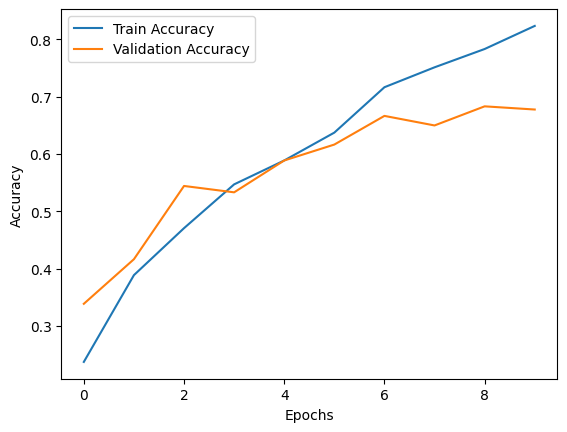

In [13]:
import os
import zipfile
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define paths
base_dir = "/mnt/data/Satellite_extracted"
categories = ["barrel_jellyfish", "blue_jellyfish", "compass_jellyfish", "lions_mane_jellyfish", "mauve_stinger_jellyfish", "Moon_jellyfish"]  # Removed 'Train_Test_Valid'
img_size = 128  # Resize all images to 128x128

data = []
labels = []

# Load images and labels
for category in categories:
    category_path = os.path.join(base_dir, category)
    if not os.path.exists(category_path):
        print(f"Warning: Directory '{category_path}' not found. Skipping...")
        continue

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        # Check if the file is an image
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        img = cv2.imread(img_path)

        # Check if image was loaded correctly
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, (img_size, img_size))  # Resize
            data.append(img)
            labels.append(categories.index(category))  # Convert category to index
        else:
            print(f"Warning: Could not load image '{img_path}'. Skipping...")

# Convert to NumPy arrays and normalize
X = np.array(data) / 255.0  # Normalize pixel values
Y = np.array(labels)

# Split into train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer with softmax
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), batch_size=32)

# Evaluate model
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


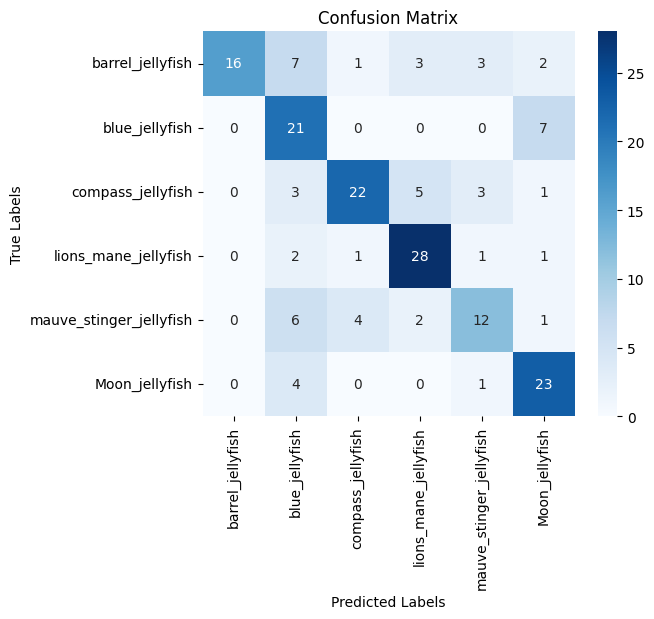

                         precision    recall  f1-score   support

       barrel_jellyfish       1.00      0.50      0.67        32
         blue_jellyfish       0.49      0.75      0.59        28
      compass_jellyfish       0.79      0.65      0.71        34
   lions_mane_jellyfish       0.74      0.85      0.79        33
mauve_stinger_jellyfish       0.60      0.48      0.53        25
         Moon_jellyfish       0.66      0.82      0.73        28

               accuracy                           0.68       180
              macro avg       0.71      0.67      0.67       180
           weighted avg       0.72      0.68      0.68       180



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict labels for the test set
Y_pred_probs = model.predict(X_test)
Y_pred = np.argmax(Y_pred_probs, axis=1)  # Convert softmax probabilities to class labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(Y_test, Y_pred, target_names=categories))


In [15]:
from statsmodels.stats.proportion import proportions_ztest

# Model's observed accuracy
p = acc  # Use the model's accuracy from model.evaluate()

# Baseline accuracy (random guessing for 4 classes)
p0 = 1 / len(categories)  # 0.25 for 4 categories

# Sample size (number of test samples)
n = len(Y_test)

# Perform Z-test
z_stat, p_value = proportions_ztest(count=p * n, nobs=n, value=p0, alternative='larger')

# Print results
print(f"Z-Statistic: {z_stat:.3f}")
print(f"P-Value: {p_value:.5f}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The model performs significantly better than random guessing.")
else:
    print("Fail to reject the null hypothesis: No significant difference from random guessing.")


Z-Statistic: 14.673
P-Value: 0.00000
Reject the null hypothesis: The model performs significantly better than random guessing.


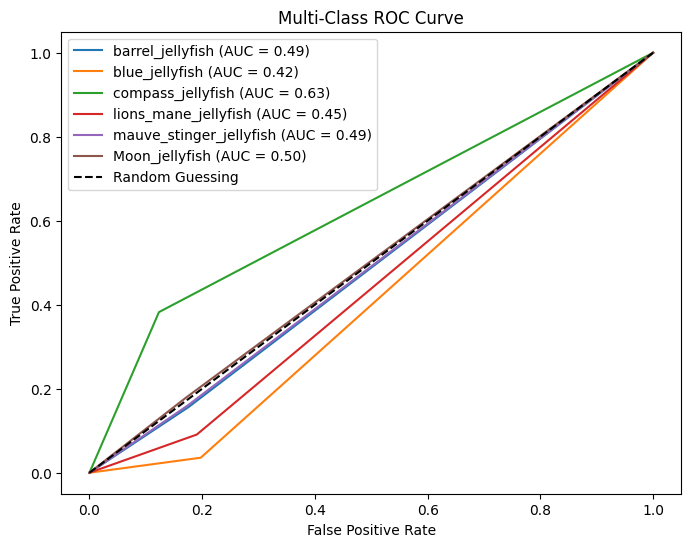

In [25]:
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(categories)):
    # Binarize the output
    Y_test_bin = label_binarize(Y_test, classes=list(range(len(categories))))

    # Get predicted probabilities for the current class
    # Y_pred_probs_class = Y_pred_probs[:, i]  # Probabilities for the current class - Original
    Y_pred_probs_class = Y_pred_probs  # Corrected line: Y_pred_probs is already 1-D

    # Calculate fpr, tpr, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(Y_test_bin[:, i], Y_pred_probs_class)

    # Calculate AUC for the current class
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, label=f"{categories[i]} (AUC = {roc_auc:.2f})")

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import classification_report

# Predict class labels
Y_pred_probs = model.predict(X_test)
Y_pred = np.argmax(Y_pred_probs, axis=1)  # Convert softmax probabilities to class labels

# Generate classification report
report = classification_report(Y_test, Y_pred, target_names=categories)
print("Classification Report:\n", report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report:
                          precision    recall  f1-score   support

       barrel_jellyfish       1.00      0.50      0.67        32
         blue_jellyfish       0.49      0.75      0.59        28
      compass_jellyfish       0.79      0.65      0.71        34
   lions_mane_jellyfish       0.74      0.85      0.79        33
mauve_stinger_jellyfish       0.60      0.48      0.53        25
         Moon_jellyfish       0.66      0.82      0.73        28

               accuracy                           0.68       180
              macro avg       0.71      0.67      0.67       180
           weighted avg       0.72      0.68      0.68       180



In [18]:
from statsmodels.stats.proportion import proportions_ztest

# Observed accuracy (from model evaluation)
p = acc  # Model's test accuracy from model.evaluate()

# Baseline accuracy (random guessing for 4 classes)
p0 = 1 / len(categories)  # 0.25

# Number of test samples
n = len(Y_test)

# Perform Z-test
z_stat, p_value = proportions_ztest(count=p * n, nobs=n, value=p0, alternative='larger')

# Print results
print(f"Z-Statistic: {z_stat:.3f}")
print(f"P-Value: {p_value:.5f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The model performs significantly better than random guessing.")
else:
    print("Fail to reject the null hypothesis: No significant difference from random guessing.")


Z-Statistic: 14.673
P-Value: 0.00000
Reject the null hypothesis: The model performs significantly better than random guessing.


In [20]:
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# --- Paths ---
zip_path = "/jellyfish dataset.zip"
extract_dir = "/mnt/data/Jellyfish_extracted"
data_dir = extract_dir  # Images are directly under this root
subfolders = [
    "Moon_jellyfish",
    "barrel_jellyfish",
    "blue_jellyfish",  # Positive class
    "compass_jellyfish",
    "lions_mane_jellyfish",
    "mauve_stinger_jellyfish"
]

# --- Step 1: Extract ZIP if not already done ---
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("ZIP extracted successfully.")
else:
    print("Already extracted.")

# --- Step 2: Load, label, and resize images ---
X = []
y = []

for category in subfolders:
    category_path = os.path.join(data_dir, category)
    if not os.path.exists(category_path):
        print(f"Directory {category_path} not found.")
        continue

    # Binary classification: 1 if blue_jellyfish, else 0
    label = 1 if category == "blue_jellyfish" else 0

    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)
        if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            continue

        image = cv2.resize(image, (64, 64))  # Resize to 64x64
        X.append(image.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} images. Positive samples: {np.sum(y)}")

# --- Step 3: Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 4: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 5: Train Logistic Regression ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# --- Step 6: Predict and Evaluate ---
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("\n--- Confusion Matrix ---")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp} → Type I Error")
print(f"False Negatives (FN): {fn} → Type II Error")
print(f"True Negatives (TN): {tn}")


ZIP extracted successfully.
Loaded 900 images. Positive samples: 150

--- Confusion Matrix ---
True Positives (TP): 13
False Positives (FP): 18 → Type I Error
False Negatives (FN): 21 → Type II Error
True Negatives (TN): 128


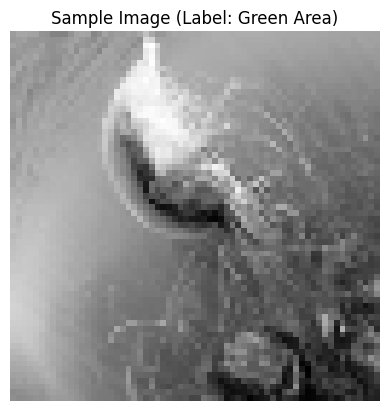

In [21]:
import random

index = random.randint(0, len(X) - 1)
sample_img = X[index].reshape(64, 64)

plt.imshow(sample_img, cmap='gray')
plt.title("Sample Image (Label: " + ("Green Area" if y[index] == 1 else "Not Green") + ")")
plt.axis('off')
plt.show()
